In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

%load_ext autoreload
%autoreload 2

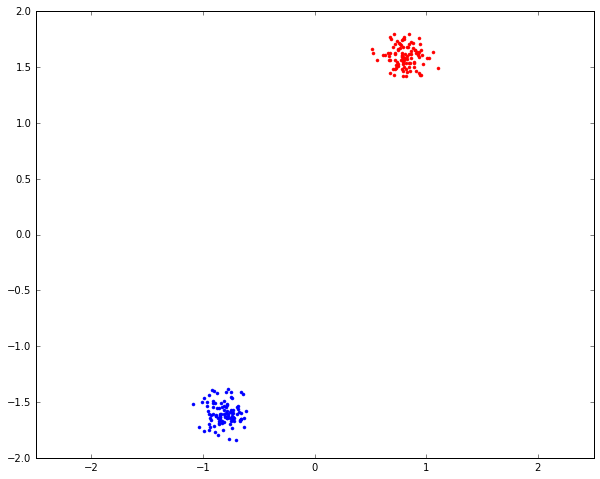

In [3]:
N = 100
mean_x, mean_y, std = 0.8, 1.6, 0.01
covariance = [[std, 0], [0, std]]

x1, y1 = np.random.multivariate_normal([-mean_x, -mean_y], covariance, N).T
x2, y2 = np.random.multivariate_normal([mean_x, mean_y], covariance, N).T
x = np.append(x1, x2)
y = np.append(y1, y2)
label = np.append(np.ones(N), np.ones(N) * -1)

plt.plot(x1, y1, '.', color='blue')
plt.plot(x2, y2, '.', color='red')
plt.axis('equal')
plt.show()

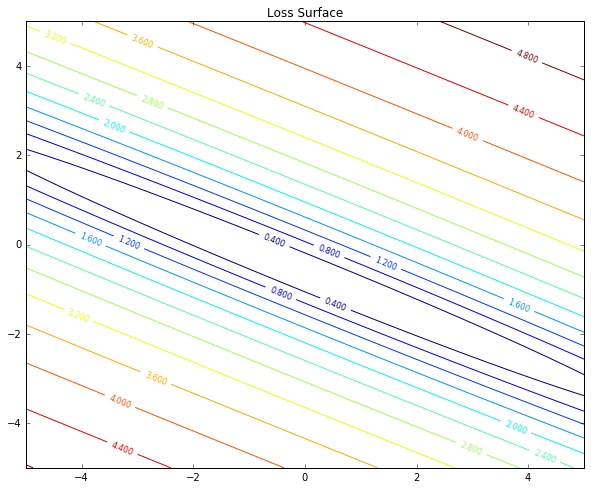

In [7]:
def log_LMS(x, y):
    return np.log(np.sqrt(np.sum((x-y) * (x-y), axis=1)))

def LMS(x, y):
    return np.log(np.mean((x - y) ** 2, axis=1))

def net(w1, w2, b, x1, x2):
    return w1[:, np.newaxis].dot(x1[np.newaxis, :]) + w2[:, np.newaxis].dot(x2[np.newaxis, :]) + b

loss_function = LMS

w1 = np.linspace(-5, 5, 500)
w2 = np.linspace(-5, 5, 500)
W1, W2 = np.meshgrid(w1, w2)
w1 = W1.reshape(np.prod(W1.shape))
w2 = W2.reshape(np.prod(W2.shape))
Z = net(w1, w2, 1, x, y)
loss = loss_function(Z, label)
loss = loss.reshape(W1.shape)

CS = plt.contour(W1, W2, loss, 12)
plt.clabel(CS, inline=1, fontsize=8)
plt.title('Loss Surface')
plt.show()